In [51]:
import urllib3
import pandas as pd
import logging
from pprint import pprint
import io

url = 'https://datahub.ckan.io/dataset/610fb217-0499-40e7-b53f-a50c9b02b98f/resource/772b62d8-0847-4104-ad97-ceac7fb0438d/download/beijing-aqm.txt'
logging.captureWarnings(True)
http = urllib3.PoolManager()

response = http.request('GET', url)
data = response.data.decode('utf-8')
    
df = pd.read_csv(io.StringIO(data), sep='\t')
df.head()

,reading,date,aqi
0,1,3/1/10 22:00,172.0
1,2,3/1/10 23:00,173.0
2,3,3/2/10 0:00,174.0
3,4,3/2/10 1:00,174.0
4,5,3/2/10 2:00,178.0


In [31]:
df.date = pd.to_datetime(df.date,infer_datetime_format=True)

reading      int64
date        object
aqi        float64
dtype: object

In [53]:
df = df.dropna()

In [54]:
df.set_index('reading')

,date,aqi
reading,,
1,3/1/10 22:00,172.0
2,3/1/10 23:00,173.0
3,3/2/10 0:00,174.0
4,3/2/10 1:00,174.0
5,3/2/10 2:00,178.0
6,3/2/10 3:00,178.0
7,3/2/10 4:00,182.0
8,3/2/10 5:00,180.0
9,3/2/10 6:00,184.0


In [89]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df['hour'] = pd.DatetimeIndex(df['date']).hour

In [142]:
df_hour_noir = df[df.hour == 23]
df_hour_jour = df[df.hour == 6]

In [143]:
df_hour.head()

,reading,date,aqi,year,month,day,hour
2,3,3/2/10 0:00,174.0,2010,3,2,0
26,27,3/3/10 0:00,179.0,2010,3,3,0
50,51,3/4/10 0:00,173.0,2010,3,4,0
74,75,3/5/10 0:00,298.0,2010,3,5,0
98,99,3/6/10 0:00,66.0,2010,3,6,0


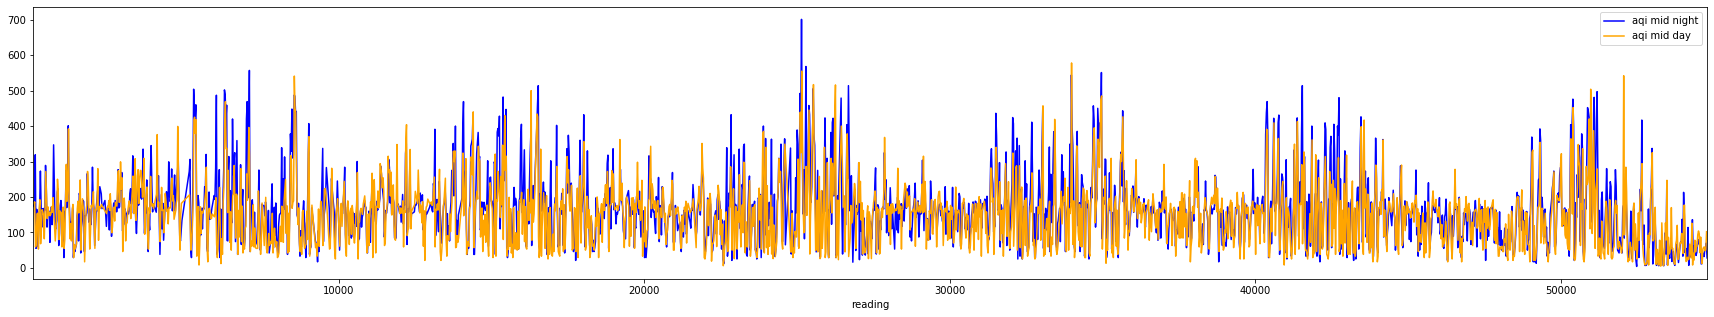

In [144]:
import matplotlib.pyplot as plt

ax = df_hour_noir.plot(x='reading', y='aqi',color='blue', label='aqi mid night')
df_hour_jour.plot(x='reading', y='aqi',color='orange', label = 'aqi mid day', ax=ax)
plt.rcParams["figure.figsize"] = [30, 5]
plt.show()

In [137]:
df_fit = df[(df.year==2016) & (df.month==5) & (df.day==31)]

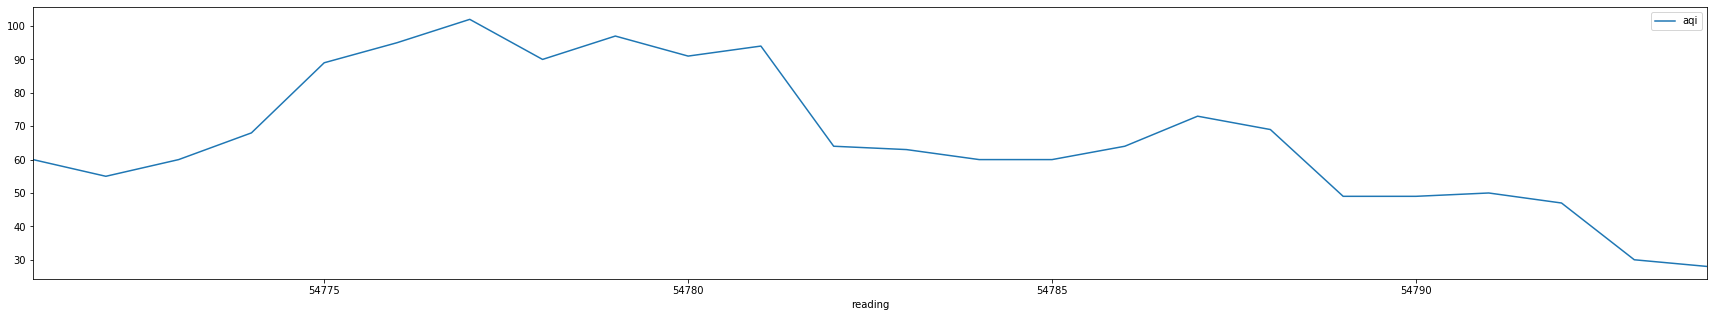

In [138]:
df_fit = df_fit
df_fit.plot(x='reading', y='aqi')
plt.show()


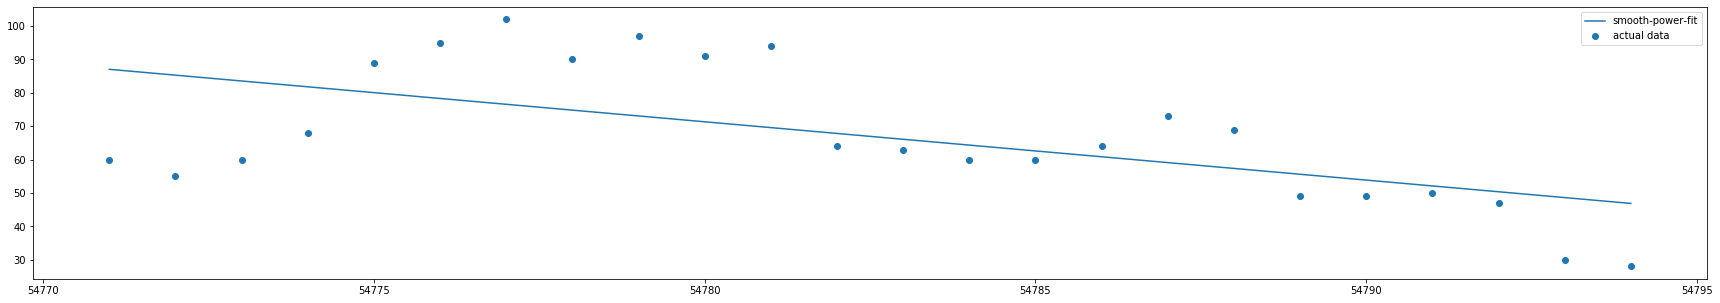

In [141]:
# make a smooth trend line based on polynomial ax^2+bx
import numpy as np
from scipy.optimize import curve_fit

# x = [5.5, 6.0, 6.5, 7, 9]
# y = [100, 80, 40, 10, 5]
x = df_fit.reading
y = df_fit.aqi
popt, pcov = curve_fit(lambda fx,a,b: a*fx**2 + b*fx,  x,  y)
x_linspace = np.linspace(min(x), max(x), 100)
power_y = popt[0]*x_linspace**2 + popt[1]*x_linspace

plt.scatter(x, y, label='actual data')
plt.plot(x_linspace, power_y, label='smooth-power-fit')
plt.legend()
plt.show()

Calculate the monthly average based on year and month. 

In [152]:
year_range = (df.year.min(), df.year.max())

In [154]:
for year in range(year_range[0], year_range[1]+1):
    month_range = (df[df.year==year].month.min(), df[df.year==year].month.max())
    for month in range(month_range[0], month_range[1]+1):
        day_range = (df[(df.year==year) & (df.month==month)].day.min(), 
                     df[(df.year==year) & (df.month==month)].day.max())
        for day in range(day_range[0], day_range[1]+1):
            hour_range = (df[(df.year==year) & (df.month==month) & (df.day==day)].hour.min(), 
                          df[(df.year==year) & (df.month==month) & (df.day==day)].hour.max())
            # print(year, month, day, hour_range)
        

2010 3 1 (22, 23)
2010 3 2 (0, 23)
2010 3 3 (0, 23)
2010 3 4 (0, 23)
2010 3 5 (0, 23)
2010 3 6 (0, 23)
2010 3 7 (0, 23)
2010 3 8 (0, 23)
2010 3 9 (0, 23)
2010 3 10 (0, 23)
2010 3 11 (0, 23)
2010 3 12 (0, 23)
2010 3 13 (0, 23)
2010 3 14 (0, 23)
2010 3 15 (0, 23)
2010 3 16 (0, 23)
2010 3 17 (0, 23)
2010 3 18 (0, 23)
2010 3 19 (0, 23)
2010 3 20 (0, 23)
2010 3 21 (0, 23)
2010 3 22 (0, 22)
2010 3 23 (0, 23)
2010 3 24 (0, 23)
2010 3 25 (0, 23)
2010 3 26 (0, 23)
2010 3 27 (0, 23)
2010 3 28 (0, 23)
2010 3 29 (0, 23)
2010 3 30 (0, 13)
2010 3 31 (7, 23)
2010 4 1 (0, 23)
2010 4 2 (0, 23)
2010 4 3 (0, 23)
2010 4 4 (0, 23)
2010 4 5 (0, 23)
2010 4 6 (0, 23)
2010 4 7 (0, 23)
2010 4 8 (0, 23)
2010 4 9 (0, 23)
2010 4 10 (0, 23)
2010 4 11 (0, 23)
2010 4 12 (0, 23)
2010 4 13 (0, 23)
2010 4 14 (0, 23)
2010 4 15 (0, 23)
2010 4 16 (0, 23)
2010 4 17 (0, 23)
2010 4 18 (0, 23)
2010 4 19 (0, 23)
2010 4 20 (0, 23)
2010 4 21 (0, 23)
2010 4 22 (0, 23)
2010 4 23 (0, 23)
2010 4 24 (0, 23)
2010 4 25 (0, 23)
2010 4 26

2011 6 4 (0, 23)
2011 6 5 (0, 23)
2011 6 6 (0, 23)
2011 6 7 (0, 23)
2011 6 8 (0, 23)
2011 6 9 (0, 23)
2011 6 10 (0, 23)
2011 6 11 (0, 23)
2011 6 12 (0, 23)
2011 6 13 (0, 23)
2011 6 14 (0, 23)
2011 6 15 (0, 23)
2011 6 16 (0, 23)
2011 6 17 (0, 23)
2011 6 18 (0, 23)
2011 6 19 (0, 23)
2011 6 20 (0, 23)
2011 6 21 (0, 23)
2011 6 22 (0, 23)
2011 6 23 (0, 23)
2011 6 24 (0, 23)
2011 6 25 (0, 23)
2011 6 26 (0, 23)
2011 6 27 (0, 23)
2011 6 28 (0, 23)
2011 6 29 (0, 23)
2011 6 30 (0, 23)
2011 7 1 (0, 23)
2011 7 2 (0, 23)
2011 7 3 (0, 23)
2011 7 4 (0, 23)
2011 7 5 (0, 23)
2011 7 6 (0, 23)
2011 7 7 (0, 23)
2011 7 8 (0, 23)
2011 7 9 (0, 23)
2011 7 10 (0, 23)
2011 7 11 (0, 23)
2011 7 12 (0, 23)
2011 7 13 (0, 23)
2011 7 14 (0, 23)
2011 7 15 (0, 23)
2011 7 16 (0, 23)
2011 7 17 (0, 23)
2011 7 18 (0, 23)
2011 7 19 (0, 23)
2011 7 20 (0, 23)
2011 7 21 (0, 23)
2011 7 22 (0, 23)
2011 7 23 (0, 23)
2011 7 24 (0, 23)
2011 7 25 (0, 23)
2011 7 26 (0, 23)
2011 7 27 (0, 23)
2011 7 28 (0, 23)
2011 7 29 (0, 23)
2011 7 

2012 9 17 (0, 23)
2012 9 18 (0, 23)
2012 9 19 (0, 23)
2012 9 20 (0, 23)
2012 9 21 (0, 23)
2012 9 22 (0, 23)
2012 9 23 (0, 23)
2012 9 24 (0, 23)
2012 9 25 (0, 23)
2012 9 26 (0, 23)
2012 9 27 (0, 23)
2012 9 28 (0, 23)
2012 9 29 (0, 23)
2012 9 30 (0, 23)
2012 10 1 (0, 23)
2012 10 2 (0, 23)
2012 10 3 (0, 23)
2012 10 4 (0, 23)
2012 10 5 (0, 23)
2012 10 6 (0, 23)
2012 10 7 (0, 23)
2012 10 8 (0, 23)
2012 10 9 (0, 23)
2012 10 10 (0, 23)
2012 10 11 (0, 23)
2012 10 12 (0, 23)
2012 10 13 (0, 23)
2012 10 14 (0, 23)
2012 10 15 (0, 23)
2012 10 16 (0, 23)
2012 10 17 (0, 23)
2012 10 18 (0, 23)
2012 10 19 (0, 23)
2012 10 20 (0, 23)
2012 10 21 (0, 23)
2012 10 22 (0, 23)
2012 10 23 (0, 23)
2012 10 24 (0, 23)
2012 10 25 (0, 23)
2012 10 26 (0, 23)
2012 10 27 (0, 23)
2012 10 28 (0, 23)
2012 10 29 (0, 23)
2012 10 30 (0, 23)
2012 10 31 (0, 23)
2012 11 1 (0, 23)
2012 11 2 (0, 23)
2012 11 3 (0, 23)
2012 11 4 (0, 23)
2012 11 5 (0, 23)
2012 11 6 (0, 23)
2012 11 7 (0, 23)
2012 11 8 (0, 23)
2012 11 9 (0, 23)
2012 1

2013 12 26 (0, 23)
2013 12 27 (0, 23)
2013 12 28 (0, 23)
2013 12 29 (0, 17)
2013 12 30 (11, 23)
2013 12 31 (0, 23)
2014 1 1 (0, 23)
2014 1 2 (0, 23)
2014 1 3 (0, 23)
2014 1 4 (0, 23)
2014 1 5 (0, 23)
2014 1 6 (0, 23)
2014 1 7 (0, 23)
2014 1 8 (0, 23)
2014 1 9 (0, 23)
2014 1 10 (0, 23)
2014 1 11 (0, 23)
2014 1 12 (0, 23)
2014 1 13 (0, 23)
2014 1 14 (0, 23)
2014 1 15 (0, 23)
2014 1 16 (0, 23)
2014 1 17 (0, 23)
2014 1 18 (0, 23)
2014 1 19 (0, 23)
2014 1 20 (0, 23)
2014 1 21 (0, 23)
2014 1 22 (0, 23)
2014 1 23 (0, 23)
2014 1 24 (0, 23)
2014 1 25 (0, 23)
2014 1 26 (0, 23)
2014 1 27 (0, 23)
2014 1 28 (0, 23)
2014 1 29 (0, 23)
2014 1 30 (0, 23)
2014 1 31 (0, 23)
2014 2 1 (0, 23)
2014 2 2 (0, 23)
2014 2 3 (0, 23)
2014 2 4 (0, 23)
2014 2 5 (0, 23)
2014 2 6 (0, 23)
2014 2 7 (0, 23)
2014 2 8 (0, 23)
2014 2 9 (0, 23)
2014 2 10 (0, 23)
2014 2 11 (0, 23)
2014 2 12 (0, 23)
2014 2 13 (0, 23)
2014 2 14 (0, 23)
2014 2 15 (0, 23)
2014 2 16 (0, 23)
2014 2 17 (0, 23)
2014 2 18 (0, 23)
2014 2 19 (0, 23)
201

2015 3 30 (10, 23)
2015 3 31 (0, 23)
2015 4 1 (0, 23)
2015 4 2 (0, 23)
2015 4 3 (0, 23)
2015 4 4 (0, 23)
2015 4 5 (0, 23)
2015 4 6 (0, 23)
2015 4 7 (0, 23)
2015 4 8 (0, 23)
2015 4 9 (0, 23)
2015 4 10 (0, 23)
2015 4 11 (0, 23)
2015 4 12 (0, 23)
2015 4 13 (0, 23)
2015 4 14 (0, 23)
2015 4 15 (0, 23)
2015 4 16 (0, 23)
2015 4 17 (0, 23)
2015 4 18 (0, 23)
2015 4 19 (0, 23)
2015 4 20 (0, 23)
2015 4 21 (0, 23)
2015 4 22 (0, 23)
2015 4 23 (0, 23)
2015 4 24 (0, 23)
2015 4 25 (0, 23)
2015 4 26 (0, 23)
2015 4 27 (0, 23)
2015 4 28 (0, 23)
2015 4 29 (0, 23)
2015 4 30 (0, 23)
2015 5 1 (0, 23)
2015 5 2 (0, 23)
2015 5 3 (0, 23)
2015 5 4 (0, 23)
2015 5 5 (0, 23)
2015 5 6 (0, 23)
2015 5 7 (0, 23)
2015 5 8 (0, 23)
2015 5 9 (0, 23)
2015 5 10 (0, 23)
2015 5 11 (0, 23)
2015 5 12 (0, 23)
2015 5 13 (0, 23)
2015 5 14 (0, 23)
2015 5 15 (0, 23)
2015 5 16 (0, 23)
2015 5 17 (0, 23)
2015 5 18 (0, 23)
2015 5 19 (0, 23)
2015 5 20 (0, 23)
2015 5 21 (0, 23)
2015 5 22 (0, 23)
2015 5 23 (0, 23)
2015 5 24 (0, 23)
2015 5 25